In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train_set.csv")
train_labels = pd.read_csv("train_set_labels.csv")

# Data Set:
Imported dataset: 40 columns and 59400 rows/instances
Merged labels with info

In [3]:
# file.head()
train = pd.merge(train, train_labels, on='id')
print(train.head())
train, test = train_test_split(train, test_size=0.2)
test.head()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private       ...        \
0  34.938093  -9.856322                  none            0       ...         
1  34.698766  -2.147466              Zahanati            0       ...         
2  37.460664  -3.821329           Kwa Mahundi            0       ...         
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0       ...         
4  31.130847  -1.825359               Shuleni            0       ...         

  water_quality quality_group      quantity  quantity_group  \

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
38955,46103,3000.0,2011-03-08,Danida,908,DANID,35.388181,-7.659426,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
6515,67145,0.0,2011-03-10,Co,1394,Ki,36.871976,-6.307473,Kwa Chalinze,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
16203,29948,0.0,2011-07-28,Danida,0,Central government,33.903025,-9.436378,Mabunga-Shuleni,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
22870,2020,500.0,2011-03-23,Rc Church,1989,ACRA,34.663542,-9.276346,Kwa Donatus Kilumile,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
53907,67056,0.0,2012-11-07,Tlc,0,TLC,32.536971,-4.508178,Mhonge,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [4]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

# Quality Group Distribution

Distribution of attribute quality_group

good        50818

salty        5195

unknown      1876

milky         804

colored       490

fluoride      217

Name: quality_group, dtype: int64

good => functional more

else non-functional more

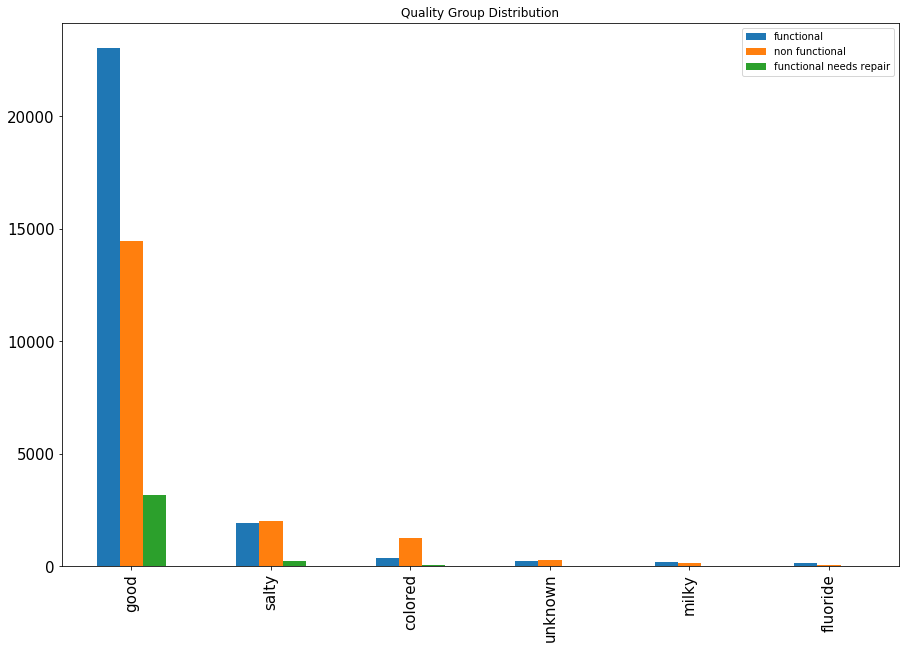

In [66]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["quality_group"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["quality_group"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["quality_group"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["quality_group"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Quality Group Distribution", figsize=(15, 10), legend=True, fontsize=15)



# Labels
Functional ~ Non-functional
very low needs repair

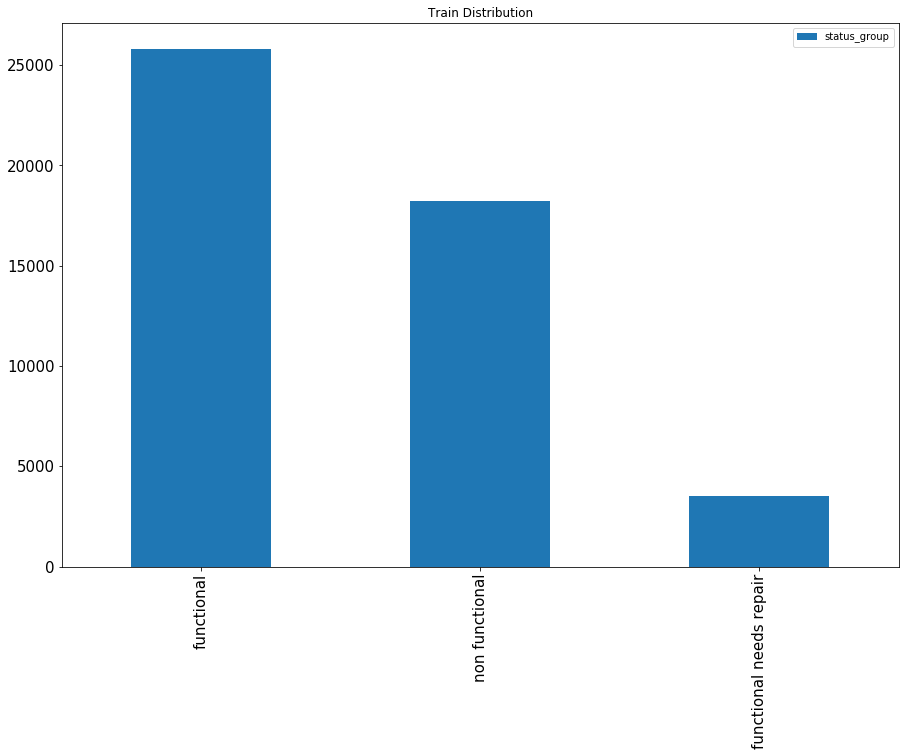

In [61]:
train['status_group'].value_counts().plot(kind='bar', title ="Train Distribution", figsize=(15, 10), legend=True, fontsize=15)

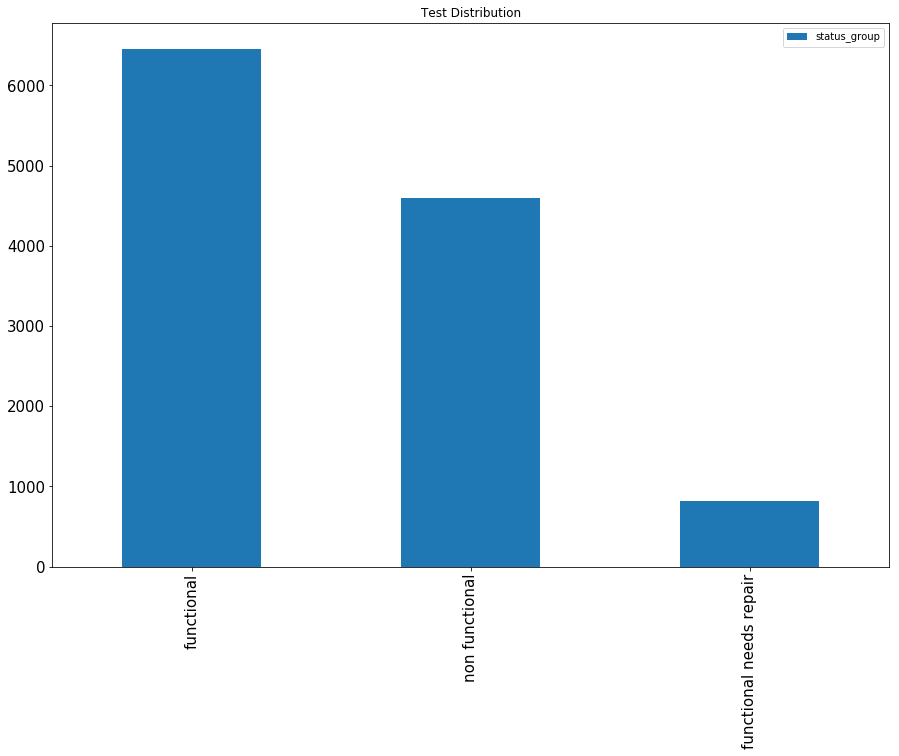

In [62]:
test['status_group'].value_counts().plot(kind='bar', title ="Test Distribution", figsize=(15, 10), legend=True, fontsize=15)

# Label Vs Payment Type
If not being paid for, non-functional is more than functional, else functional are more

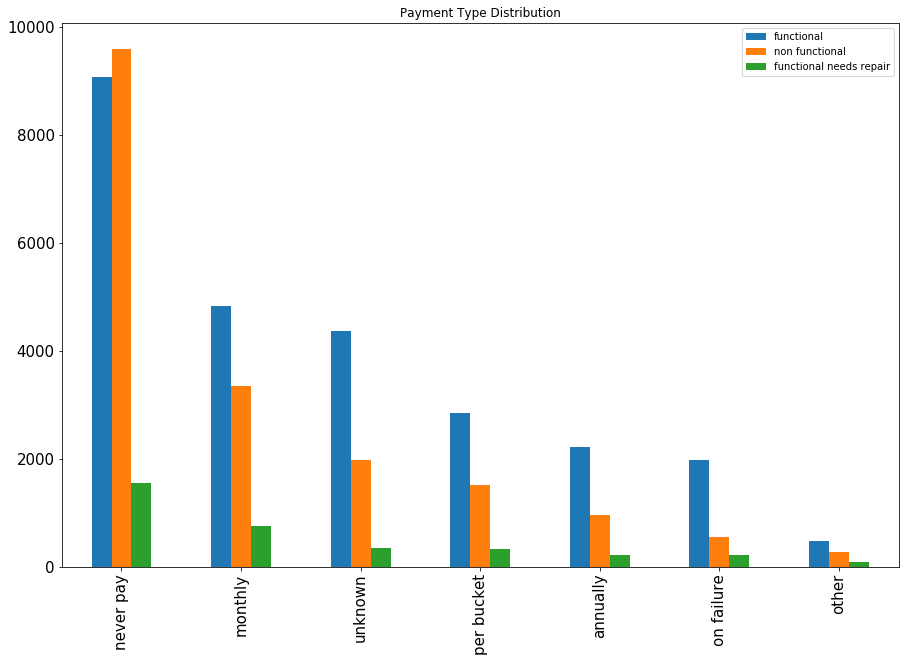

In [65]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["payment_type"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["payment_type"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["payment_type"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["payment_type"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Payment Type Distribution", figsize=(15, 10), legend=True, fontsize=15)



# Source vs Functionality
No direct conclusion

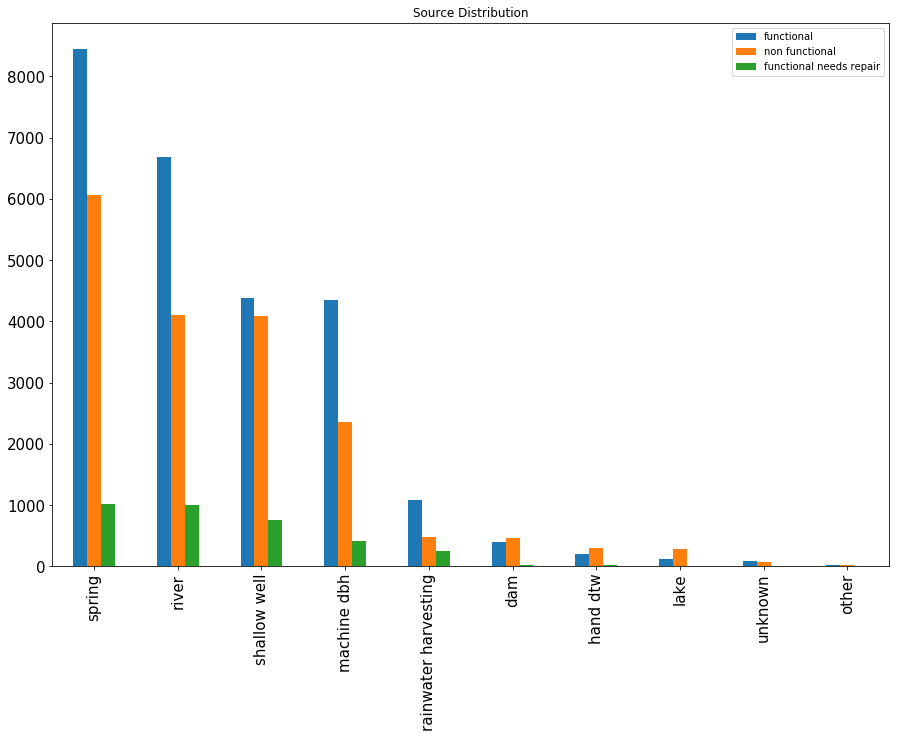

In [67]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["source"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["source"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["source"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["source"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Source Distribution", figsize=(15, 10), legend=True, fontsize=15)



# Quantity vs Functionality
ENough water => more functional
else less functional

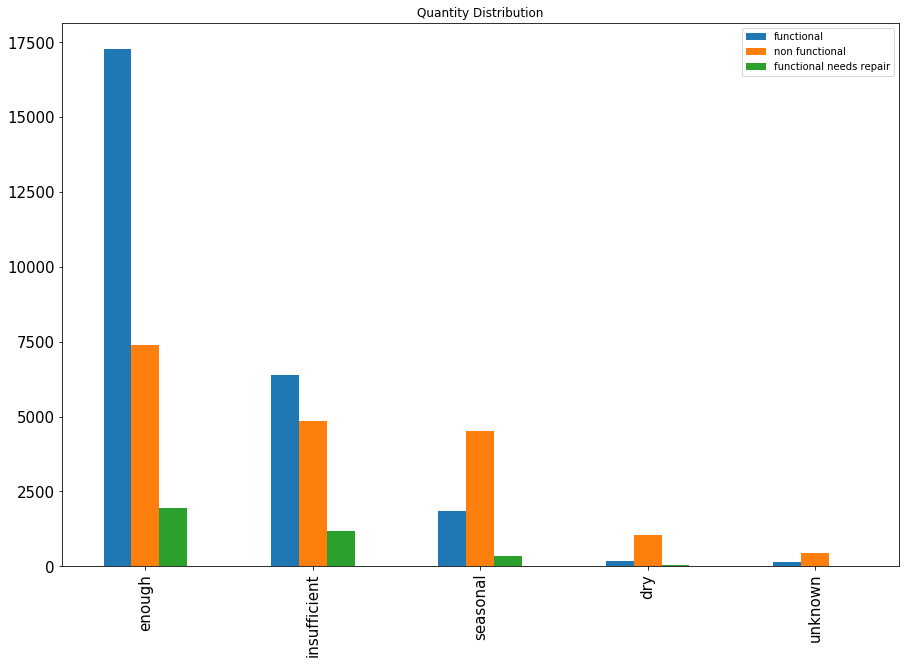

In [75]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["quantity"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["quantity"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["quantity"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["quantity"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Quantity Distribution", figsize=(15, 10), legend=True, fontsize=15)



# Installer vs Functionality
There are categories with similar names, but which are recognized different due to different cases (lowercase/uppercase, e.g. World vision and World Vision) of some part or whole of the category -- converting all to lowercase -- or some abbreviations (e.g. Gover and Government, Commu and Community). Our assumption is that if the name (in it's exact given form) is different, then the categories are different, else they are already being recognized as same.

DWE funds more than any other organization.
Most of government installed are non-functional


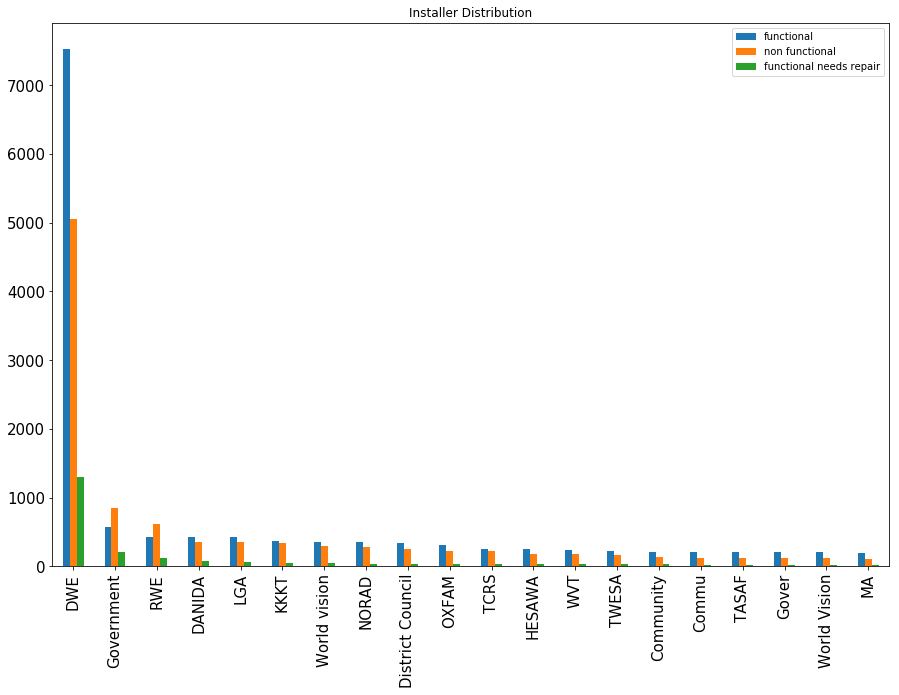

In [73]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["installer"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='non functional']["installer"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='functional needs repair']["installer"].value_counts().nlargest(20).tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["installer"].value_counts().nlargest(20).index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Installer Distribution", figsize=(15, 10), legend=True, fontsize=15)



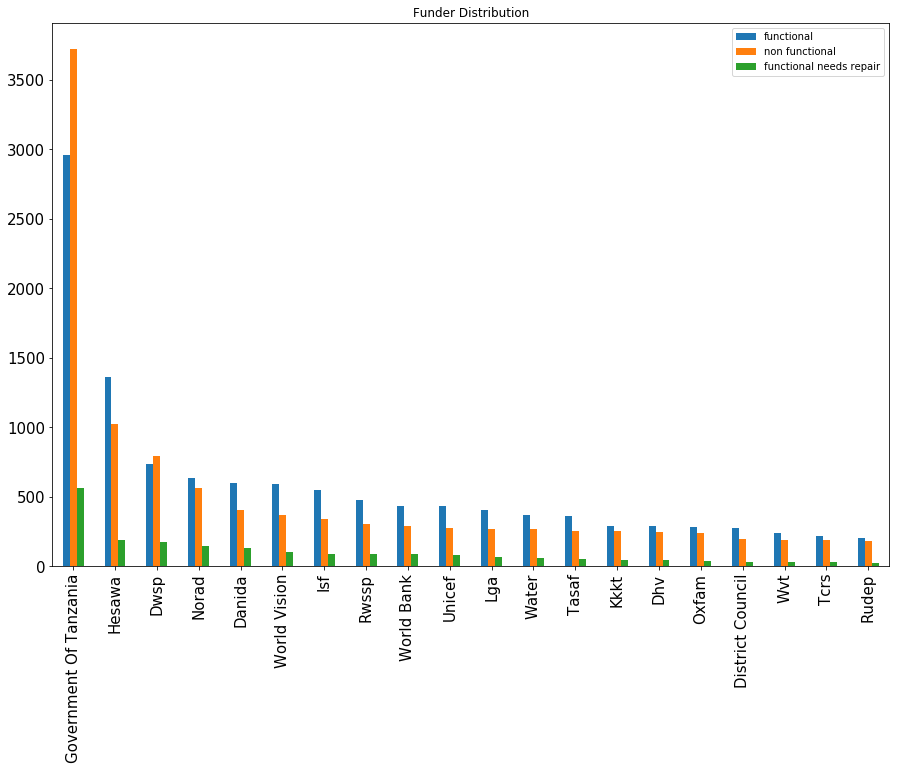

In [74]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["funder"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='non functional']["funder"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='functional needs repair']["funder"].value_counts().nlargest(20).tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["funder"].value_counts().nlargest(20).index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Funder Distribution", figsize=(15, 10), legend=True, fontsize=15)



In [ ]:
print(train[train["status_group"]=='functional'].groupby(["basin","subvillage","region","lga","ward"]).count())
print(train[train["status_group"]=='non functional'].groupby(["basin","subvillage","region","lga","ward"]).count())
print(train[train["status_group"]=='functional needs repair'].groupby(["basin","subvillage","region","lga","ward"]).count())

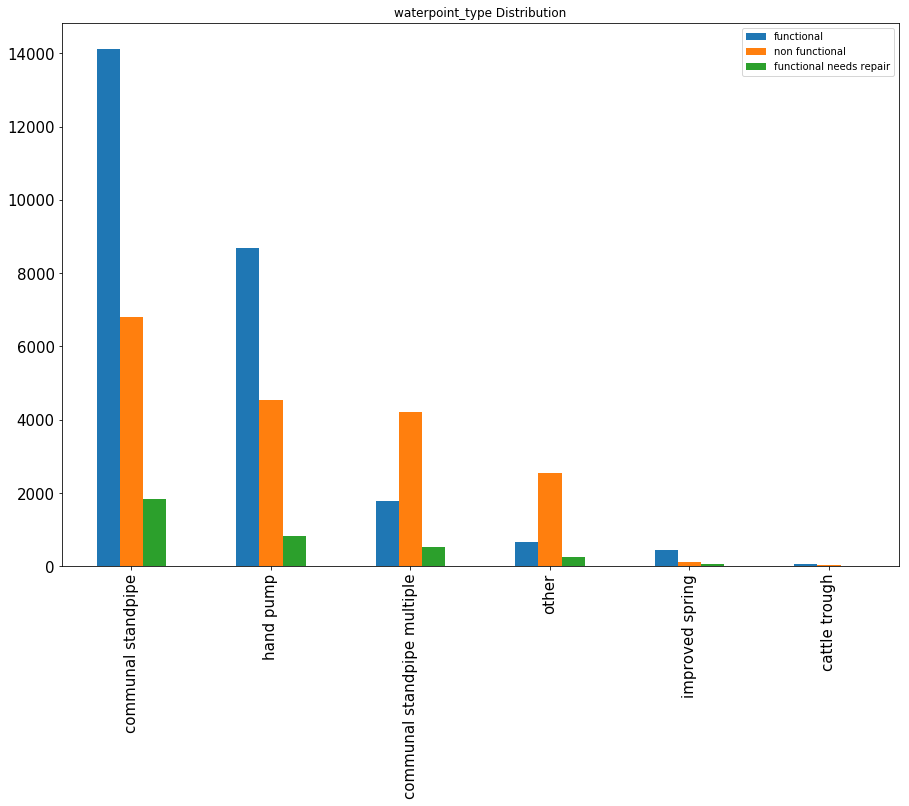

In [76]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["waterpoint_type"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["waterpoint_type"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["waterpoint_type"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["waterpoint_type"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="waterpoint_type Distribution", figsize=(15, 10), legend=True, fontsize=15)



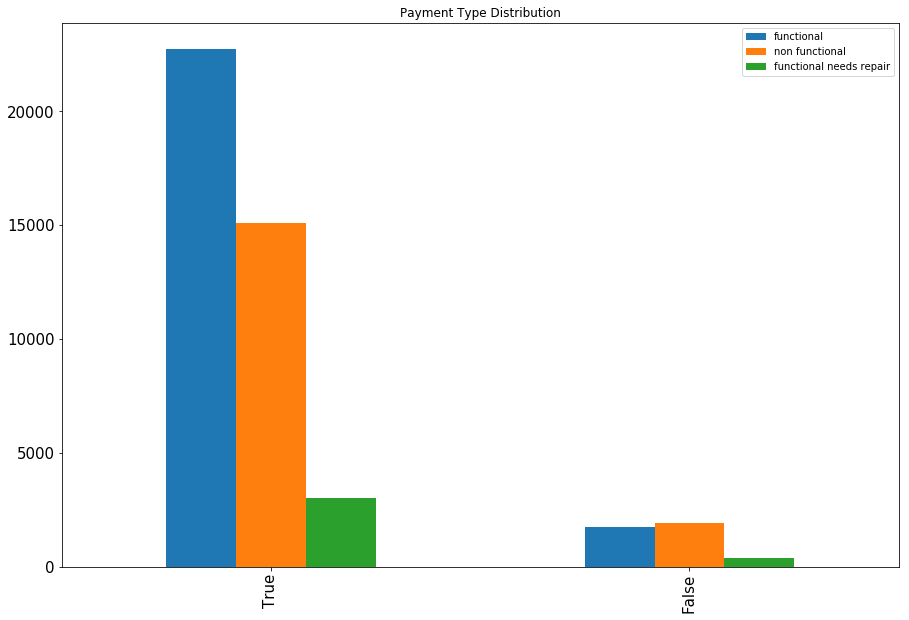

In [78]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["public_meeting"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["public_meeting"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["public_meeting"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["public_meeting"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Payment Type Distribution", figsize=(15, 10), legend=True, fontsize=15)



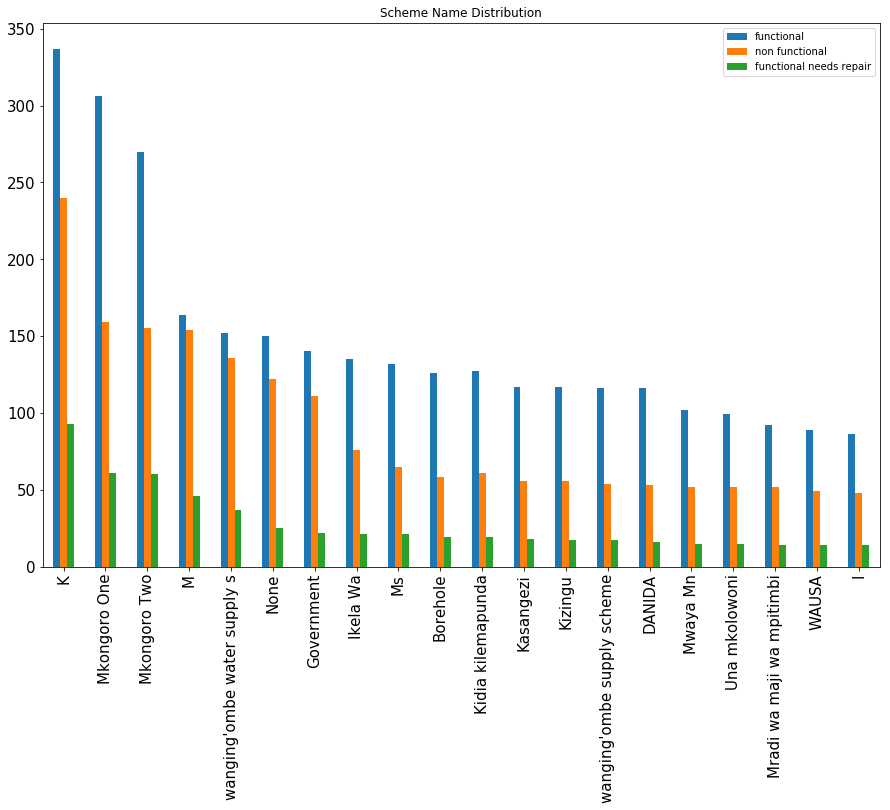

In [82]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["scheme_name"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='non functional']["scheme_name"].value_counts().nlargest(20).tolist(),
                        train[train['status_group']=='functional needs repair']["scheme_name"].value_counts().nlargest(20).tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["scheme_name"].value_counts().nlargest(20).index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Scheme Name Distribution", figsize=(15, 10), legend=True, fontsize=15)



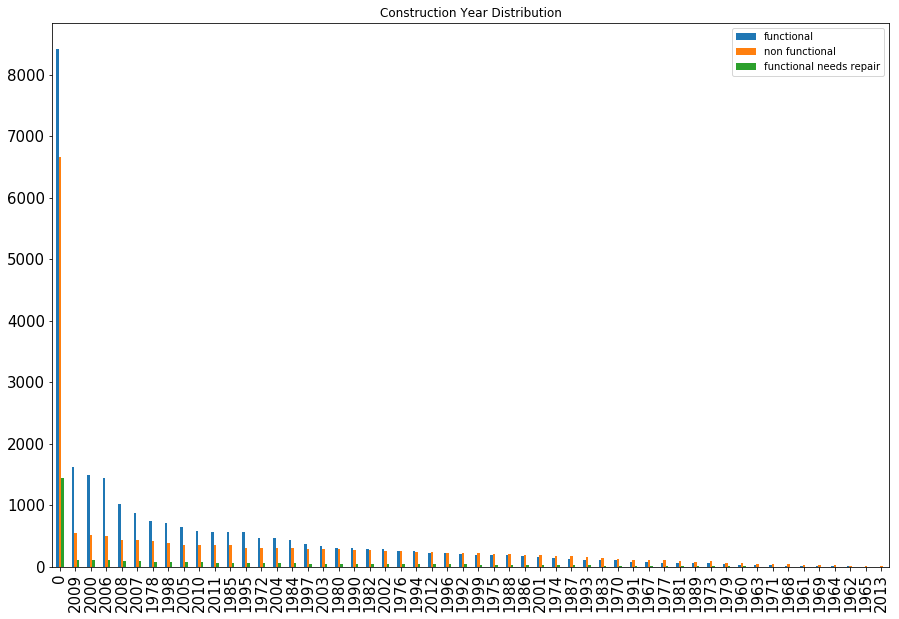

In [85]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["construction_year"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["construction_year"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["construction_year"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["construction_year"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Construction Year Distribution", figsize=(15, 10), legend=True, fontsize=15)



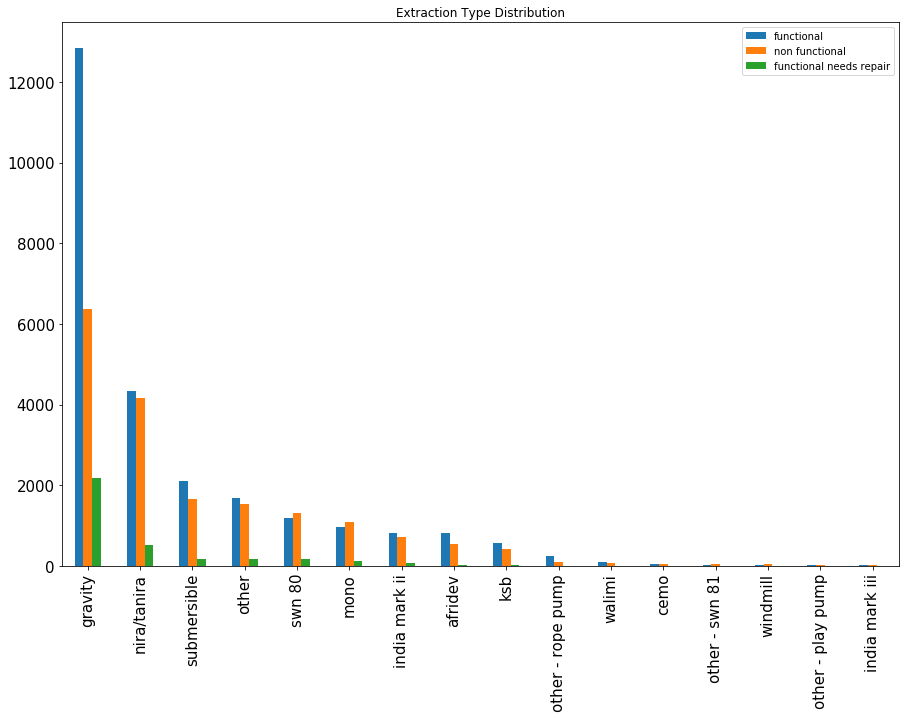

In [89]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["extraction_type"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["extraction_type"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["extraction_type"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["extraction_type"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Extraction Type Distribution", figsize=(15, 10), legend=True, fontsize=15)



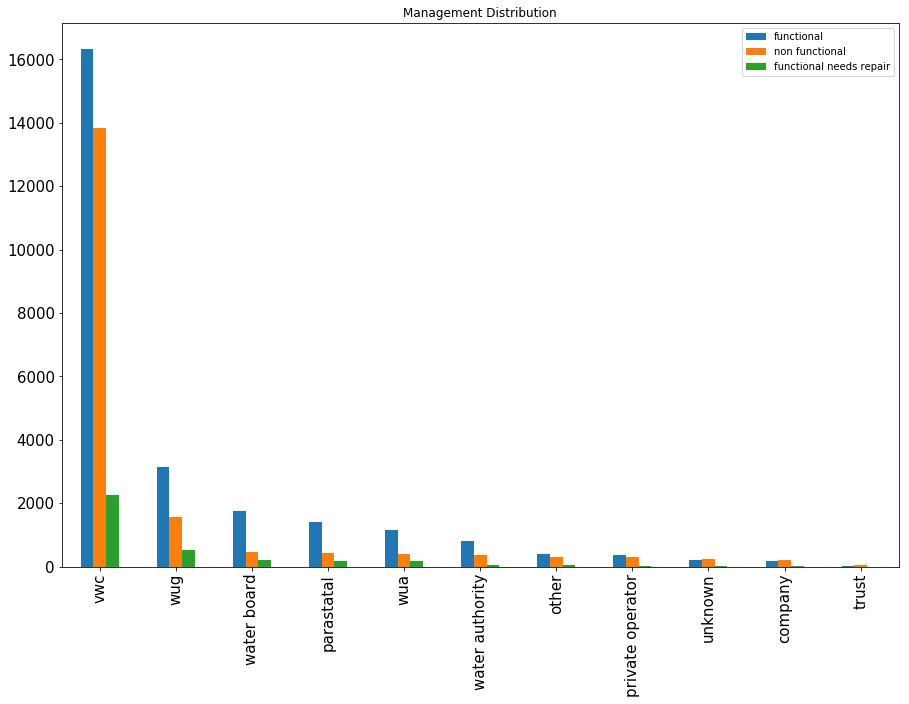

In [90]:
newTable = pd.DataFrame(list(zip(train[train['status_group']=='functional']["management"].value_counts().tolist(),
                        train[train['status_group']=='non functional']["management"].value_counts().tolist(),
                        train[train['status_group']=='functional needs repair']["management"].value_counts().tolist())),
                       columns=['functional', 'non functional', 'functional needs repair'],
                        index=train[train['status_group']=='functional needs repair']["management"].value_counts().index.values)

newTable.sort_values(by='functional needs repair', ascending=False).plot(kind='bar', title ="Management Distribution", figsize=(15, 10), legend=True, fontsize=15)

